In [66]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype('int')

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Preprocessing**

In [7]:
states = df.pop('State')

In [13]:
X, y = df.drop(columns='Churn'), df['Churn']

In [14]:
X.shape, y.shape

((3333, 18), (3333,))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_holdout, y_train, y_holdout = \
    train_test_split(X, y, test_size=0.3, random_state=17)

In [17]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

In [18]:
y_train.shape, y_holdout.shape

((2333,), (1000,))

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree = DecisionTreeClassifier(random_state=17)

**Fit-predict**

In [21]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [23]:
from sklearn.metrics import accuracy_score

In [46]:
pred_holdout = tree.predict(X_holdout)

In [47]:
accuracy_score(y_holdout, pred_holdout)

0.921

In [26]:
y_holdout.value_counts(normalize=True) # baseline

0    0.867
1    0.133
Name: Churn, dtype: float64

**Cross-validation from scratch**

In [49]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [50]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [52]:
from tqdm import tqdm_notebook

In [59]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []
# for each value of max_depth
max_depth_values = np.arange(1, 11)
for depth in tqdm_notebook(max_depth_values):
    tree = DecisionTreeClassifier(random_state=17, max_depth=depth)
    # perform cross-validation
    val_score = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    cv_accuracies_by_depth.append(val_score.mean())
    
    # assess the model with holdout
    tree.fit(X_train, y_train)
    pred = tree.predict(X_holdout)
    ho_score = accuracy_score(y_holdout, pred)

    ho_accuracies_by_depth.append(ho_score)

Text(0.5, 1.0, 'Decision Tree validation curves by depth')

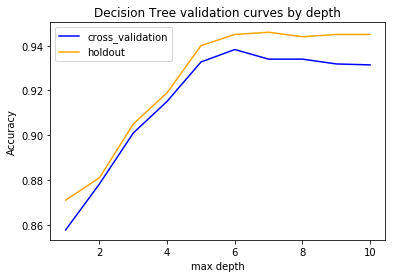

In [70]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cross_validation', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree validation curves by depth')

In [61]:
ho_accuracies_by_depth

[0.871, 0.881, 0.905, 0.919, 0.94, 0.945, 0.946, 0.944, 0.945, 0.945]

**Cross-validation sklearn**

In [29]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [30]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [39]:
params = {'max_depth': np.arange(1, 11), 'min_samples_leaf': np.arange(1, 11)}

In [40]:
best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

In [41]:
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [42]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

In [43]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [44]:
best_tree.best_score_

0.9417059579939991

**Holdout assesment**

In [48]:
pred_holdout_better = best_tree.best_estimator_.predict(X_holdout)
accuracy_score(y_holdout, pred_holdout_better)

0.947

In [71]:
import Graphviz

ModuleNotFoundError: No module named 'Graphviz'

**Visualizing the tree**

In [73]:
from sklearn.tree import export_graphviz

In [77]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

In [78]:
export_graphviz(decision_tree=tree, out_file='../../../mlcourse_data/tree_depth3.dot', \
                filled=True, feature_names=X.columns)

In [79]:
!cat ../../../mlcourse_data/tree_depth3.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Total day minutes <= 264.45\ngini = 0.255\nsamples = 2333\nvalue = [1983, 350]", fillcolor="#e58139d2"] ;
1 [label="Customer service calls <= 3.5\ngini = 0.206\nsamples = 2182\nvalue = [1927, 255]", fillcolor="#e58139dd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="International plan <= 0.5\ngini = 0.149\nsamples = 2004\nvalue = [1842, 162]", fillcolor="#e58139e9"] ;
1 -> 2 ;
3 [label="gini = 0.096\nsamples = 1828\nvalue = [1736, 92]", fillcolor="#e58139f1"] ;
2 -> 3 ;
4 [label="gini = 0.479\nsamples = 176\nvalue = [106, 70]", fillcolor="#e5813957"] ;
2 -> 4 ;
5 [label="Total day charge <= 27.185\ngini = 0.499\nsamples = 178\nvalue = [85, 93]", fillcolor="#399de516"] ;
1 -> 5 ;
6 [label="gini = 0.209\nsamples = 76\nvalue = [9, 67]", fillcolor="#399de5dd"] ;
5 -> 6 ;
7 [label="gini = 0.38\nsamples = 102\nvalue = [76, 26]", fillcolor="#e58139a8"] ;
5 -> 7 ;
8 [label="Voice mail plan <